<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ds5110/summer-2021/blob/master/02b-DataViz.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# 2b -- DataViz

## Goals

* Load (and clean) a CSV from the web ([gapminder dataset](https://cran.r-project.org/web/packages/gapminder/))
* Custom visualizations with matplotlib & scipy.stats
* Tell a better story with data

## Related reading

* [Visualizing distributions of data](https://seaborn.pydata.org/tutorial/distributions.html) -- tutorial at seaborn.pydata.org
* [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb) -- selections from Chapters 3 & 4

# Load a CSV from github

* [https://github.com/ds5110](https://github.com/ds5110/summer-2021/blob/master/data/gapminder.csv)
  * Navigate to the folder with data
  * Look at the data (if you can)
  * Copy the "Raw" URL to the clipboard
  * Load the URL into a dataframe with `pandas.read_csv()`
  * Look at the data locally
* [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv) reference docs -- pandas.pydata.org
  * Reading a (nicely organized) CSV file in Python couldn't be easier
* Pandas dataframe
  * [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) reference docs -- pandas.pydata.org
  * We'll be working with pandas DataFrames a lot in the course

In [ ]:
# Import pandas (standard practice)
import pandas as pd

# Find some data (a CSV file on github)
url = "https://github.com/ds5110/summer-2021/raw/master/data/gapminder.csv"

# Load the CSV into a pandas DataFrame
df = pd.read_csv(url)

# Inspect the data
df

,Unnamed: 0,country,continent,year,lifeExp,pop,gdpPercap
0,1,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,2,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,3,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,4,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,5,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...,...
1699,1700,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,1701,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,1702,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,1703,Zimbabwe,Africa,2002,39.989,11926563,672.038623


## Keep things clean (drop a column)

* What is the "Unnamed: 0" column doing there?
  * You could use it as an index
  * Or you can delete the column from the dataframe
* How do you delete a column from a dataframe?
  * Google "Delete column dataframe"
  * [Delete a column from a dataframe](https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe) -- stackoverflow
  * Wes McKinney recommends using `del`
  * 2nd answer got more votes
* `del` keyword in Python
  * [first link in a google search](https://www.w3schools.com/python/ref_keyword_del.asp) -- w3schoold.com

In [ ]:
# You could use the first column as the index, but there's no need.
# And it could be confusing (starting at 1 violates convention of starting at 0)
df = pd.read_csv(url, index_col=0)
df

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1952,28.801,8425333,779.445314
2,Afghanistan,Asia,1957,30.332,9240934,820.853030
3,Afghanistan,Asia,1962,31.997,10267083,853.100710
4,Afghanistan,Asia,1967,34.020,11537966,836.197138
5,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1700,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1701,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1702,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1703,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [ ]:
# Use the Python "del" keyword to remove an object, this works
# But it might seem a bit obscure if you're new to Python
df = pd.read_csv(url)
del df["Unnamed: 0"]
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [ ]:
# Dropping a column works too.  It's a bit easier to find in the docs.
# And it's a common practice (as evidenced from stackoverflow)
df = pd.read_csv(url)
df = df.drop("Unnamed: 0", 1)
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [ ]:
# You can also drop a column "in place"
# Compare with reassignment in the previous cell
df = pd.read_csv(url)
df.drop("Unnamed: 0", 1, inplace=True)
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


# Histogram

Visualizing the data distribution.

* Histogram
  * One way to look at the data: "bin" it and plot it
  * Create some "bins" and count the data falling in each bin
  * Then use a bar chart to compare the bin counts
  * If the data are random and normally distributed (big if), mean and variance are all you need.
* [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
  * It's easy with pandas -- read the docs!
* [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)
  * the `DataFrame` object has a `hist` method
  * `DataFrame.hist` divides the range of the data into "bins"
  * `bins` parameter: int or sequence, default 10
  * Histogram plots the number of values that fall in each bin (the "count")
* Recall: Everything in Python is an object
  * Objects have attributes and methods, accessible using "dot" notation
  * A pandas dataframe has a built-in `.hist()` method

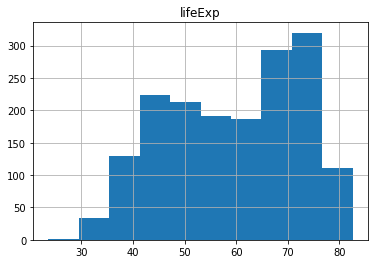

In [ ]:
df.hist(column="lifeExp");

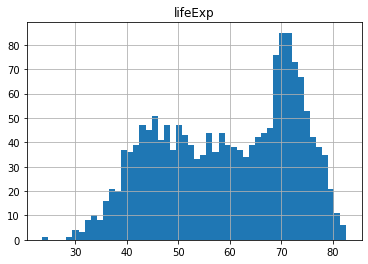

In [ ]:
# Change the number of bins -- one of many adjustable function parameters
# Notice how the vertical range (bin count) changes with the number of bins
df.hist(column="lifeExp", bins=50);

# Customizing a plot

* Q: What's wrong with the plots above?
  * A: No labels, other than a title (column name)
  * Someone else looking at this plot may wonder what you're showing.
  * Since `matplotlib` is under the hood, it's easy to customize the plot
* The [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) method (function) has a "return value"
  * The API reference docs have additional informative detail
  * `hist` method returns "matplotlib.AxesSubplot or numpy.ndarray of them"
  * We can use the return value to customize the plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd439cc0e90>]],
      dtype=object)

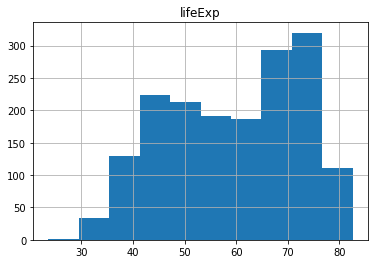

In [ ]:
# Get a copy of the return value and "look" at it (or print it)
# The returned value is an array of matplotlib axes
# Use the array "shape" method to see the shape of the array
hist = df.hist(column="lifeExp")
hist

How do you add axis labels to a (matplotlib) plot?

* You know that matplotlib is under the hood, so...
* A: Google: "matplotlib axes label" -- the top link is a matplotlib example
* https://matplotlib.org/stable/gallery/pyplots/fig_axes_labels_simple.html

Text(0.5, 1.0, 'Life Expectancy')

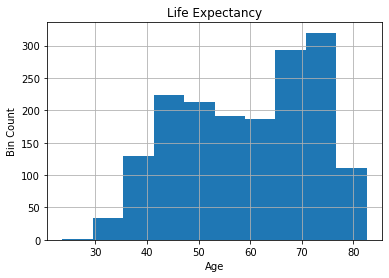

In [ ]:
# Add labels with the matplotlib axes
axes = df.hist(column="lifeExp")
axes[0, 0].set_ylabel("Bin Count")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_title("Life Expectancy")

## Q: What does this tell you?

Before answering the question, a little probability and statistics with Python...


# Random numbers

* Recall [Anscombe's quartet](https://seaborn.pydata.org/examples/anscombes_quartet.html) -- seaborn.pydata.org
  * Are your data [IID](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)? (independent and identically distributed)
* If you know the mean and variance, you know a lot...
  * ...provided the data are **random, independent and normally distributed**!
  * the scatter around the line (upper-left figure) might be normally distributed
  * Central Limit Theorem explains the prevalence of the "bell curve"
    * the sum of independent random variables tends toward a normal distribution
    * ...regardless of their distribution!
    * it provides a baseline for understanding your data
  * if the data are not normally distributed, you should know why
    * there may be something interesting going on
    * your analysis could provide insight
    * there may be some underlying predictability
* Pseudo-random number generation with Python
  * random number generators provide a nice baseline
  * [`random`](https://docs.python.org/3/library/random.html) Python reference docs -- docs.python.org
  * [`random.seed`](https://docs.python.org/3/library/random.html#bookkeeping-functions) -- for reproducibility!


In [ ]:
# Import the python built-in module for random numbers
import random

In [ ]:
# Pseudo-random number generation with Python
# Run this cell several times to get an idea
random.random()

0.43208730561645925

In [ ]:
# Reproducible random numbers
# Q: What happens if you uncomment the next line?
# random.seed(42)

n = 5
sum = 0
for i in range(n):
  y = random.random()
  sum += y
  print(i, y)

print('Average:', sum / n)

0 0.3135306793947755
1 0.7432035409073339
2 0.2980638850230708
3 0.4845845411545031
4 0.4964960265468089
Average: 0.4671757346052985


# Introducing numpy

Random number generation is a more streamlined in numpy

* [`numpy.random`](https://numpy.org/doc/stable/reference/random/index.html) -- random numbers with numpy
* [`numpy.random.rand`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) -- uniform distribution on [0,1)
  * arguments determine the "shape" of the returned "array"
  * "convenience function" for matlab users
* there are many other methods with numpy

In [ ]:
# Random numbers with numpy
import numpy as np

n = 5
s = np.random.rand(n)

print(s)
print('mean:', s.mean())
print('standard deviation', s.std())

[0.38223057 0.23005464 0.35094811 0.8829081  0.38002444]
mean: 0.44523317289754855
standard deviation 0.2258195398935523


# Probability distributions

* [real-valued distributions](https://docs.python.org/3/library/random.html#real-valued-distributions) -- there are quite a few
* Random uniform (equal probability in a given range)
  * [`random.random`](https://docs.python.org/3/library/random.html#random.random)
  * [`numpy.random.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)
* Random normal ("bell curve")
  * mean (average value) and variance (spread around the mean)
  * [`random.gauss`](https://docs.python.org/3/library/random.html#random.gauss) -- built-in version
  * [`random.normalvariate`](https://docs.python.org/3/library/random.html#random.normalvariate) -- built-in "thread-safe" version
* With numpy
  * [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) -- numpy reference docs -- numpy.org

In [ ]:
# Random normal
#random.seed(42)

for i in range(5):
  print(random.normalvariate(mu=0, sigma=1))

0.013928161385119786
0.49765600114159414
-0.3199969101012509
-1.847416906349936
0.8716926094646965


In [ ]:
# Random numbers with numpy
import numpy as np

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

print(abs(mu - np.mean(s))) # Should be close to 0
print(abs(sigma - np.std(s, ddof=1))) # Should be close to 0

0.0005801556761584199
0.000786831671743482


## Q: Now what?

Let's compare our data to the normal distribution and some normally distributed random numbers (simulated data).

We could use `DataFrame.hist`, but pandas doesn't have any built-in random number generation. So we have choices:

* Put the random numbers in a dataframe and use `DataFrame.hist()`, or
* Use `matplotlib` ourselves (Pandas uses matplotlib under the hood), or
* Use Seaborn
  * Seaborn makes it easy to do some common tasks
  * Uses matplotlib under the hood

We're going to use Seaborn (and matplotlib)...


# Introducing seaborn

A very nice Python library for statistical data visualization

* [seaborn.pydata.org](https://seaborn.pydata.org/)
* Ref: [Visualizing data distributions with seaborn](https://seaborn.pydata.org/tutorial/distributions.html)
* [pydata.org](https://pydata.org/)
* [Skewness](https://en.wikipedia.org/wiki/Skewness) -- wikipedia

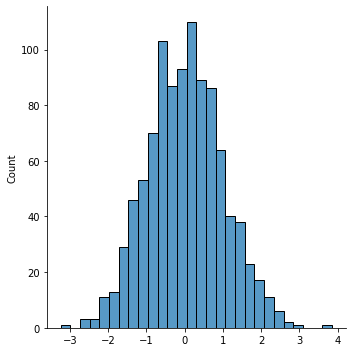

In [ ]:
import seaborn as sns

# For reproducibility
np.random.seed(42)

# Generate some normally distributed random data
# Q: What if you change "normal" to "uniform"?
fake_data = np.random.normal(size=1000)

# Plot the normalized histogram (i.e., "sample" probability distribution)
sns.displot(fake_data);

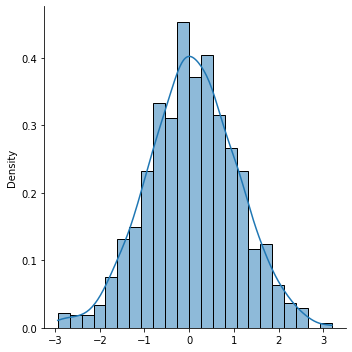

In [ ]:
# Plot the normalized histogram and a KDE. The Kernel Density Estimate (KDE) 
# is an estimate of the continuous probability distribution.
# These can be plotted easily by setting appropriate parameters of .displot()
sns.displot(np.random.normal(size=1000), stat="density", kde=True);

Q: The KDE looks "normal" when we use `np.random.randn`, but is it really?

To answer this question, we'll compare the histogram and KDE to a standard normal distribution.

Once we've done this, then we'll adapt the code to compare a histogram of our data to a normal distribution.

# Introducing scipy

Scipy has a nice example that compares a histogram with a normal (Gaussian) probability distribution.

* [scipy](https://scipy.org) -- scipy.org
  * [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html)
  * [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)
  * the example is at the end of the reference docs for `scipy.stats.norm`

To understand the example, you need to understand how it uses `matplotlib`. 

We'll dig in so that we can adapt the code for our own purposes.

# (Re)Introducing matplotlib

We've been using matplotlib the whole time, but it has been under the hood. 

Now we'll import it directly.  More specifically, we'll import a "state-based" API for matplotlib.

This will allow us to do some things that extend beyond Seaborn.

* [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) API reference docs -- matplotlib.org

## Standard normal distribution

The standard normal probability density function $\mathrm{pdf}(x)$  of $x$ is 
$$
\mathrm{pdf}(x) = \frac{1}{\sqrt{2 \pi}}e^{-  
\frac{x^2}{2}}
$$
when $x$ has zero mean and unit standard deviation.

The code below computes the PDF with `norm.pdf()` using default values `mu = 0` and `sigma = 1`.

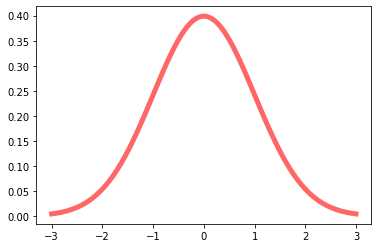

In [ ]:
# import the norm function from scipy.stats
from scipy.stats import norm

# import matplotlib.pyplot
import matplotlib.pyplot as plt

# set up the plot
fig, ax = plt.subplots(1, 1)

# Use numpy to create values for the dependent variable "x"
x = np.linspace(-3, 3, 100)

# Compute the standard normal distribution "y" for each value of "x"
y_sample = norm.pdf(x, 0, 1)
y = norm.pdf(x)

# Plot the standard normal distribution
ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='norm pdf');

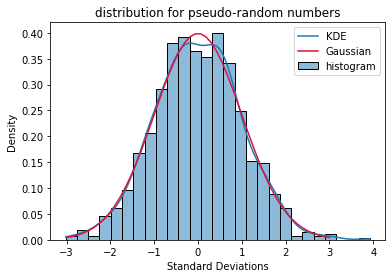

In [ ]:
# We don't need the next line because we imported it already above
# import matplotlib.pyplot as plt

# Set up the plotting (figure and axes)
fig, ax = plt.subplots()

# Create an array with the independent variable "x"
x = np.linspace(-3,3)
y = norm.pdf(x)

# Plot the normalized histogram and KDE
sns.histplot(np.random.normal(size=1000), ax=ax, stat="density", kde=True, label="histogram")

# Add a label for the KDE -- the label will be used in the legend
ax.get_lines()[0].set_label("KDE")

# Plot the normal (Gaussian) distribution
ax.plot(x, y, c="crimson", label='Gaussian')

# Label the plot
ax.set_xlabel("Standard Deviations")
ax.set_title("distribution for pseudo-random numbers")
ax.legend();

## So, is the data normally distributed?

The normal probability density function $\mathrm{pdf}(x)$  of $x$ is 
$$
\mathrm{pdf}(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{- \frac{1}{2} 
\left( \frac{x - \mu}{\sigma} \right)^2}
$$
when mean of $x$ is $\mu$ and the standard deviation is $\sigma$.

The next cell plots the PDF for sample mean `mu` and standard deviation `sigma`. 

The PDF is computed with `norm.pdf()` based on
the `mu` and `sigma` computed with `norm.fit()`.

There's a lot going on in the next cell, so each line is commented.

sample mean: 59.47
sample standard deviation: 12.91


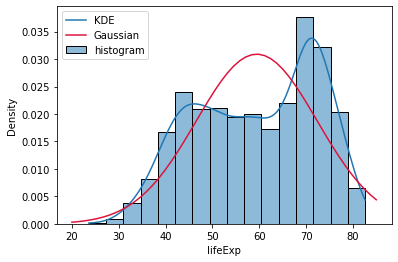

In [ ]:
# norm.fit() returns the "sample" mean and standard deviation
mu, sigma = norm.fit(df['lifeExp'])
print("sample mean: {:.2f}".format(mu))
print("sample standard deviation: {:,.2f}".format(sigma))

# Set up the plotting (figure and axes) with matplotlib
fig, ax = plt.subplots()

# Create an array with the independent variable "x" (life expectancy in years)
x = np.linspace(20,85)

# Compute the normal distribution for the sample mean and standard deviation
y = norm.pdf(x, mu, sigma)

# Plot the the normalized histogram and KDE of the data
sns.histplot(df["lifeExp"], ax=ax, stat="density", kde=True, label="histogram")

# Add a label for the KDE -- that will be used in the legend
ax.get_lines()[0].set_label("KDE")

# Plot the normal (Gaussian) distribution
ax.plot(x, y, c="crimson", label='Gaussian')

# Add the legend
ax.legend();

# Standardize the data

It's common practice to standardize data by removing the sample mean and normalizing by the sample standard deviation.

We'll standardize the data and compare the histogram to the standard normal distribution.

It's common to use other kinds of data transformations as well. But first things first...

sample mean: 59.47
sample standard deviation: 12.91


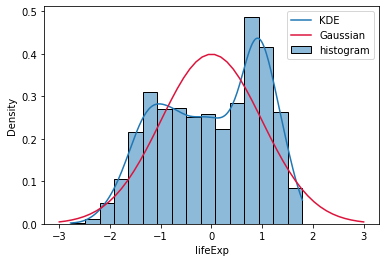

In [ ]:
# norm.fit() returns the "sample" mean and standard deviation
mean, std = norm.fit(df['lifeExp'])
print("sample mean: {:.2f}".format(mu))
print("sample standard deviation: {:,.2f}".format(sigma))

# Set up the plotting (figure and axes) with matplotlib
fig, ax = plt.subplots()

# Create an array with the independent variable "x"
x = np.linspace(-3,3)

# Compute the normal distribution for prescribed values of "x"
# Since we're using defaults, this is a standard normal (mu=0, sigma=1)
y = norm.pdf(x)

# Standardize the data (to have zero sample mean and unit sample variance)
data_standardized = (df['lifeExp'] - mean) / std

# Plot the normal (Gaussian) distribution
# superposed on the normalized histogram and KDE
sns.histplot(data_standardized, ax=ax, stat="density", kde=True, label="histogram")
ax.get_lines()[0].set_label("KDE")
ax.plot(x, y, c="crimson", label='Gaussian')
ax.legend();

# Major takeaways?

* Life expectancy has a bimodal distribution
* Does not compare well with a normal (Gaussian) distribution
* Negative skew
* The big question now: Why?
